# Exercise 1: Random and Timeit PracticeGiven a list of numbers and words, find the count of each element type in the list.
**Example** \    my_list = [2, 3, ‘word’, -1, ‘python programming language’, 9, 321] \    Count of numbers: 5 \    Count of words: 2 1. Create a function that will randomly generate a list of N numbers and words. Numbers and word counts are random and the order is random too. 2. Create a function to calculate the desired output using loops. 3. Create a function to calculate the desired output using list comprehension. 4. Use the timeit library to check the performance difference between the two solutions for different list sizes (N = 100, 1000, 10000, 100000). Plot the difference using matplotlib. 5. What conclusions can you draw from the results? 

#### Part 1: Create a function that will randomly generate a list of N numbers and words. Numbers and word counts are random and the order is random too.

In [68]:
import random
import string

def generate_random_list(N):
    """
    Given an integer N, the function will generate a list, containing x numbers and N-x words
    Numbers are sampled from a fixed NUMBER_LIST which is from [1,999]
    Words are sample from a fixed WORD_LIST which contains words 'word', 'python', 'MLDS', 'Deep Learning', 'AI'
    args:
        N : integer N, size of output list
    output:
        random_list: output list in a randomised order
    """
    # Handling N = 0 egde Case
    if N == 0:
        raise ValueError("Value of N should be greater than 0")
    print(f"N : {N}")

    # Defining fixed word list. All the words will be sampled from it
    WORD_LIST = list(string.ascii_lowercase) + list(string.ascii_uppercase)
    # Defining fixed number list which ranges from 1 to 999
    NUMBER_LIST = list(range(1,1000))
    
    # Generating a random numbers b/w 1 to N for word count and number count
    random_word_count = random.randint(1,N)
    random_number_count = N - random_word_count

    # Creating list of words and numbers from above defined list using random counts
    random_list = []
    random_list.extend(random.choices(WORD_LIST, k = random_word_count))
    random_list.extend(random.choices(NUMBER_LIST, k = random_number_count))
    random.shuffle(random_list)
    return random_list

print(generate_random_list(10))

N : 10
[200, 'y', 118, 'j', 'y', 'd', 331, 'l', 305, 392]


#### Part 2: Create a function to calculate the desired output using loops.

In [69]:
def count_numbers_and_words_using_loop(input_list):
    """
    Given a list of words and numbers, the function returns word and numbers counts in the list using for loop
    args:
        input_list: input list of words and numbers 
    returns:
        word_count : Count of words
        number_count : Count of numbers
    """
    word_count = 0
    number_count = 0
    
    # Iterating over the input list of words and numbers
    # Checking each data type and counting words and numbers
    for entry in input_list:
        if isinstance(entry, int):
            number_count+=1
        elif isinstance(entry, str):
            word_count+=1
        else:
            # Raising exception if data type is other than int or string 
            raise Exception(f"Input List should contain only str and int data types. Found {type(entry)}")

    return word_count, number_count

In [70]:
N = 10
# Generating random list of numbers and words
my_list = generate_random_list(N)
# Getting word and number count using loop
word_count, number_count = count_numbers_and_words_using_loop(input_list = my_list)

print(my_list)
print(f"Count of Words: {word_count}\nCount of Numbers: {number_count}")

N : 10
[956, 617, 'g', 'S', 'd', 327, 'd', 75, 'J', 747]
Count of Words: 5
Count of Numbers: 5


#### Part 3: Create a function to calculate the desired output using list comprehension.

In [71]:
def count_numbers_and_words_using_lc(input_list):
    """
    Given a list of words and numbers, the function returns word and numbers counts in the list using list comprehension
    args:
        input_list: input list of words and numbers 
    returns:
        word_count : Count of words
        number_count : Count of numbers
    """
    word_count = sum(1 for entry in input_list if isinstance(entry, str))
    number_count = sum(1 for entry in input_list if isinstance(entry, int))
    return word_count, number_count

In [72]:
N = 20
# Generating random list of numbers and words
my_list = generate_random_list(N)
# Getting word and number count using loop
word_count, number_count = count_numbers_and_words_using_lc(input_list = my_list)

print(my_list)
print(f"Count of Words: {word_count}\nCount of Numbers: {number_count}")

N : 20
[693, 704, 'R', 859, 'r', 889, 'e', 452, 150, 923, 'e', 236, 239, 'L', 67, 749, 207, 437, 'c', 744]
Count of Words: 6
Count of Numbers: 14


#### Part 4: Use the timeit library to check the performance difference between the two solutions for different list sizes (N = 100, 1000, 10000, 100000). Plot the difference using matplotlib.

In [73]:
import timeit
import statistics


def count_numbers_and_words_using_loop_wrapper():
    """
    Wrapper function to call count_numbers_and_words_using_loop for using timeit 
    """
    global my_list
    word_count, number_count = count_numbers_and_words_using_loop(input_list = my_list)

def count_numbers_and_words_using_lc_wrapper():
    """
    Wrapper functions to call count_numbers_and_words_using_lc for using timeit 
    """
    global my_list
    word_count, number_count = count_numbers_and_words_using_lc(input_list = my_list)

# Defining number of runs and loops as 10 and 200 respectively (CONSTANTS)
NUM_RUNS = 10 
NUM_LOOPS = 200

# Defining a list for different sizes of input list given to count_number_and_words_* functions
N_list  = [100, 1000, 10000, 100000]
loop_time_list = []
lc_time_list = []

for N in N_list:
    '''
    - Benchmarking time for "count_numbers_and_words_using_loop" and  "count_numbers_and_words_using_lc" over 
      NUN_RUNS(10) cycles and NUM_LOOPS(200) loops
    - Taking mean over all the runs to get average run time
    '''
    my_list = generate_random_list(N)
    loop_run_time = statistics.mean(timeit.repeat(count_numbers_and_words_using_loop_wrapper, repeat=NUM_RUNS, number=NUM_LOOPS))
    lc_run_time = statistics.mean(timeit.repeat(count_numbers_and_words_using_lc_wrapper, repeat=NUM_RUNS, number=NUM_LOOPS))

    loop_time_list.append(loop_run_time)
    lc_time_list.append(lc_run_time)

N : 100
N : 1000
N : 10000
N : 100000


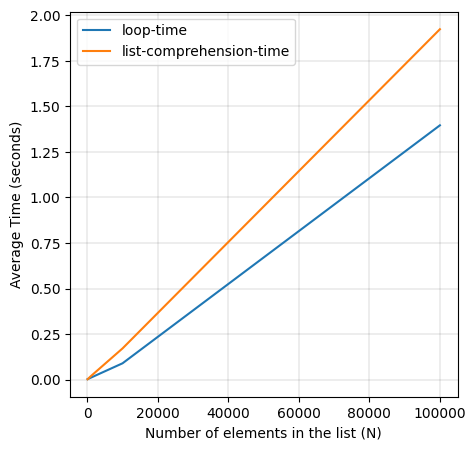

In [74]:
import matplotlib.pyplot as plt

# Creating a plot for average run time for function using loop and list comprehension for different list sizes
plt.figure(figsize=(5,5))
plt.plot(N_list, loop_time_list, label='loop-time')
plt.plot(N_list, lc_time_list, label='list-comprehension-time')
plt.xlabel('Number of elements in the list (N)')
plt.ylabel('Average Time (seconds)')
plt.grid(color='black', linestyle='-', linewidth=0.1)
plt.margins(0.05)
plt.legend()
plt.show()

#### Part 5: What conclusions can you draw from the results?

From the above plot, it is evident that list comprehension time is always greater than loop time. For this usecase, we can deduce that loops are performing faster than list comprehensions

# Exercise 2: The Collections Library

Create a function that returns the "beauty" of a string.
- Given a string s, the beauty is the sum of the beauty of the letters in it- The beauty of each letter is an integer between 1 and 26, inclusive, and no two letters have the same beauty- For each word, the most common letter should be given a beauty of 26, the second most common 25, and so on- An uppercase A and lowercase a will have the same beauty- You can ignore punctuation

Here are some inputs:- ABbCcc- Ignore punctuation, please :)- Sometimes test cases are hard to make up.And here are the outputs for them:- 152 - 491 - 729 

In [75]:
def calculate_beauty_wrapper(freq_map):
    """
    - Given a frequency map for different characters, the wrapper function calculates the beauty value for the map
    - Assigns 26 to highest freq char, 25 to second highest and so on
    args:
        freq_map: dictionary containing the frequency of different characters
    returns:
        total_beauty: beauty value of the frequency map
    """
    # Sorting frequency map in descening order of frequencies
    freq_map = sorted(zip(freq_map.values(), freq_map.keys()), reverse=True)
    beauty_num = 26
    total_beauty = 0
    for freq, ch in freq_map:
        total_beauty += beauty_num * freq
        beauty_num-=1
    return total_beauty

#### Part 1: Create a function that returns the "beauty" of a string using a defaultdict (from the Collections library) to store the counts. Apply it to the three test cases.

In [76]:
from collections import defaultdict

def calculate_beauty_using_dict(input_str):
    """
    Given an input string, the function does the following
        - Split the string into words, removes punctuation marks and creates a string
        - Creates a frequency map of characters from the string using dict
        - calculate the beauty of the string using "calculate_beauty_wrapper"
    args:
        input_str: input string
    returns:
        beauty value of the string
    """
    # Defining list of punctuation marks
    punction_marks = """:.,?!;()[]{},"""
    # Splitting string into words, removing punctuations and reconstructing the string without spaces
    input_str = "".join(word.strip(punction_marks).lower() for word in input_str.split())

    # Creating frequency map of characters from the reconstructed string
    freq_map = defaultdict(int)
    for ch in input_str:
        freq_map[ch]+=1

    # Calculating and returning beauty value of the string
    return calculate_beauty_wrapper(freq_map)

In [77]:
test_case1 = "ABbCcc"
assert calculate_beauty_using_dict(test_case1) == 152
test_case2 = "Ignore punctuation, please :)"
assert calculate_beauty_using_dict(test_case2) == 491
test_case3 = "Sometimes test cases are hard to make up."
assert calculate_beauty_using_dict(test_case3) == 729

print("All test cases passed")

All test cases passed


#### Part 2: Create a function that returns the "beauty" of a string using Counter (from the Collections library) to store the counts. Apply it to the three test cases.

In [78]:
from collections import Counter

def calculate_beauty_using_counter(input_str):
    """
    Given an input string, the function does the following
        - Split the string into words, removes punctuation marks and creates a string
        - Creates a frequency map of characters from the string using Counter
        - calculate the beauty of the string using "calculate_beauty_wrapper"
    args:
        input_str: input string
    returns:
        beauty value of the string
    """
    # Defining list of punctuation marks
    punction_marks = """:.,?!;()[]{},"""
    # Splitting string into words, removing punctuations and reconstructing the string without spaces
    input_str = "".join(word.strip(punction_marks).lower() for word in input_str.split())

    # Creating frequency map of characters using Counter from the reconstructed string
    freq_map = Counter(input_str)

    # Calculating and returning beauty value of the string    
    return calculate_beauty_wrapper(freq_map)

In [79]:
test_case1 = "ABbCcc"
assert calculate_beauty_using_counter(test_case1) == 152
test_case2 = "Ignore punctuation, please :)"
assert calculate_beauty_using_counter(test_case2) == 491
test_case3 = "Sometimes test cases are hard to make up."
assert calculate_beauty_using_counter(test_case3) == 729

print("All test cases passed")

All test cases passed


#### Part 3: Compare the two solutions. Explain which one you think is better.

The counter solution is better in two ways:
1) From the below time analysis, it can be seen Counter solution is always faster than the dictionary solution. This time diff is due to the fact that the Counter library uses C underneath which makes it faster.
2) The Counter Solution is better in the sense, it helps writing cleaner code as well

In [42]:
%%timeit -r 5 -n 1000
calculate_beauty_using_dict(test_case1)

4.32 µs ± 1.52 µs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


In [43]:
%%timeit -r 5 -n 1000
calculate_beauty_using_counter(test_case1)

4.1 µs ± 1.41 µs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


In [44]:
%%timeit -r 5 -n 1000
calculate_beauty_using_dict(test_case2)

9.42 µs ± 3.05 µs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


In [45]:
%%timeit -r 5 -n 1000
calculate_beauty_using_counter(test_case2)

8.05 µs ± 1.09 µs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


In [46]:
%%timeit -r 5 -n 1000
calculate_beauty_using_dict(test_case3)

12.2 µs ± 3.28 µs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


In [47]:
%%timeit -r 5 -n 1000
calculate_beauty_using_counter(test_case3)

9.57 µs ± 2.3 µs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


# Exercise 3: Explore a Library

Pick an extension library from PyPI or other sources (something of interest to you). Summarize the functionality provided by the library (one paragraph) and show a usage example. 
Document step-by-step how to run the example provided. 
PyPI: https://pypi.python.org/pypi

**Library** : Request \
**Link** : https://pypi.org/project/request3/

**SUMMARY**\
The requests library in Python serves as an essential tool for managing HTTP communication, enabling the initiation of various HTTP requests such as **GET,POST, PUT, PATCH, DELETE** for interaction with web services. It streamlines complex operations like handling cookies, managing sessions, and more. This library is highly versatile and adaptable, finding application in activities like data retrieval from APIs, web scraping for information extraction from web pages, and seamless interaction with web services. Its design is aligned with Python's principles, providing a user-friendly and idiomatic approach to manipulate HTTP requests and responses.

Some useful methods in request library are: 
- get : requests.get() will run a GET request on the input URL and fetch the data
- post: request.post() will run a POST request on the input URL with the given input data
- patch : request.post() will run a PATCH request on the input URL with the given input data
- put : request.post() will run a PUT request on the input URL with the given input data

Given below is an example demonstrating GET request using requests module

In [58]:
import requests

# Input URL
url = "https://www.example.com"

# Getting Contents of the URL using .get() method
response = requests.get(url)

# If the status_code is 200, means that the query is success
if response.status_code == 200:
    print(response.text)
else:
    raise requests.ConnectionError("Expected status code 200, but got {}".format(response.status_code))

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domai